In [2]:
# K-means: Makes clusters (unsupervised)

In [3]:
#The dataset contains the following columns:
#CustomerID – Unique identifier for each customer
#Gender – Male/Female
#Age – Customer's age
#Annual Income (k$) – Customer's yearly income in thousands
#Spending Score (1-100) – Score assigned by the mall based on customer behavior and spending nature
#To group the customers using K-means clustering, we will:
#Preprocess the data (e.g., convert categorical data like Gender if needed).
#Use relevant features (like Age, Income, and Spending Score).
#Determine an optimal number of clusters using the Elbow Method.
#Apply K-means.
#Visualize the clusters.

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [6]:
# Load the dataset
df = pd.read_csv(r"C:\Users\TUSHAR CHOUDHARY\Downloads\Mall_Customers.csv")

In [8]:
# View basic info
df.head() # Shows the first 5 rows

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [10]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
df.shape

(200, 5)

In [12]:
# Encode categorical column
# Convert 'Gender' to numerical values: Male=1, Female=0
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [13]:
# Select features for clustering
# We use 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)'
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [15]:
# To group the customers using K-means clustering, we will:
# Determine an optimal number of clusters using the Elbow Method.
# The Elbow Method helps you find the “sweet spot” — the ideal number of clusters where your data is grouped well, but not over-complicated.

In [16]:
# Use the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares

In [18]:
# Applying K-means

In [20]:
# It groups retail store customers based on Age, Annual Income, and Spending Score, and helps understand their behavior better.

In [19]:
# Try from 1 to 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia is the sum of squared distances

C:\Users\TUSHAR CHOUDHARY\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\TUSHAR CHOUDHARY\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\TUSHAR CHOUDHARY\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\TUSHAR CHOUDHARY\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans 

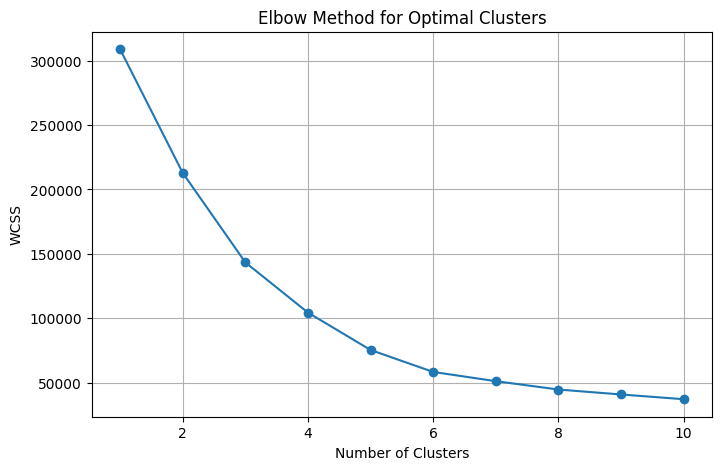

In [21]:
# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [22]:
# Note: - WCSS measures how far the customers are from the center of their group (called the centroid).
# WCSS = "How scattered your clusters are."
# Low WCSS = points are close together in each cluster = better grouping
# High WCSS = points are all over the place = poor grouping

In [25]:
# The graph usually looks like a bent arm or an elbow
#Elbow Graph:
#On the X-axis → Number of Clusters (k = 1, 2, 3, …)
#On the Y-axis → WCSS (Within-Cluster Sum of Squares)
#As you increase the number of clusters:
#The WCSS keeps decreasing
#But at some point, it flattens out — meaning adding more clusters doesn’t improve things much
#That "bend" or "elbow" in the graph is where we stop — because after that, we're just adding complexity without real improvement.

In [26]:
# Interpretation: Choose the number of clusters at the 'elbow point'
# Let's say it's 5 (you'll see this visually)

In [27]:
# Apply K-means clustering with optimal clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

C:\Users\TUSHAR CHOUDHARY\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
# Reduce dimensions to 2D for visualization using PCA (Principal Component Analysis)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

In [33]:
# Add the PCA results to the dataframe
df['PCA1'] = pca_result[:, 0] #  values of Principal Component 1
df['PCA2'] = pca_result[:, 1] # values of Principal Component 2

In [34]:
# note: - 
# Adding two new columns to my DataFrame
# These columns are:
# 'PCA1' → Principal Component 1
# 'PCA2' → Principal Component 2

# Why am I adding them?
# Because I used PCA (Principal Component Analysis) — a tool that reduces big data into smaller parts
# while keeping the most important information.

# My customer data had 3 features:
# - Age
# - Annual Income
# - Spending Score

# That's hard to visualize directly on a graph.
# PCA transforms these into 2 new, simple features:
# PCA1 → A smart mix of Age, Income, and Score
# PCA2 → Another meaningful mix of those same features

# These 2 new columns help me:
# - Visualize customers in a 2D graph (PCA1 vs PCA2)
# - Still understand their shopping patterns clearly

# So this step is about simplifying the data for better plotting and analysis.

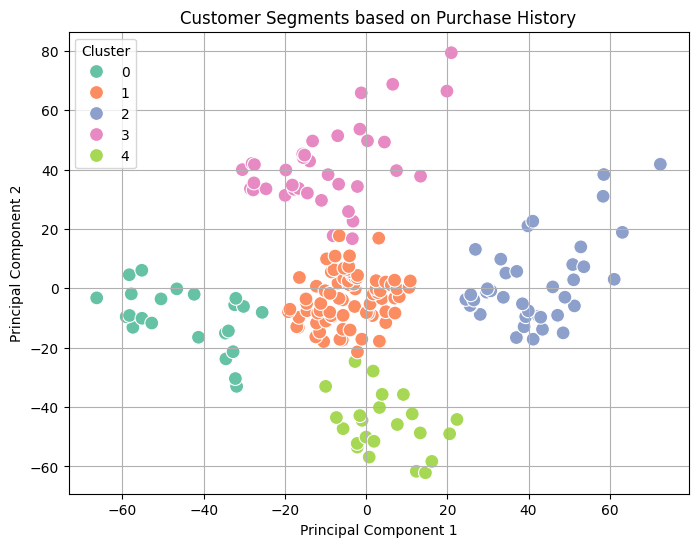

In [35]:
# Visualize the clusters using PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Segments based on Purchase History")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [36]:
# View cluster summary statistics
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nCluster-wise Averages:")
print(cluster_summary)


Cluster-wise Averages:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        45.217391           26.304348               20.913043
1        43.088608           55.291139               49.569620
2        32.692308           86.538462               82.128205
3        40.666667           87.750000               17.583333
4        25.521739           26.304348               78.565217


In [38]:
cluster_summary  # Shows average values of features within each cluster

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,45.217391,26.304348,20.913043
1,43.088608,55.291139,49.569620
2,32.692308,86.538462,82.128205
3,40.666667,87.750000,17.583333
4,25.521739,26.304348,78.565217


In [39]:
# Save the clustered data to a new CSV file
df.to_csv("Clustered_Customers.csv", index=False)

In [40]:
# Load the data
df = pd.read_csv("Clustered_Customers.csv")

In [41]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,PCA1,PCA2
0,1,1,19,15,39,0,-31.870508,-33.001425
1,2,1,21,15,81,4,0.763397,-56.843865
2,3,0,20,16,6,0,-57.408726,-13.122936
3,4,0,23,16,77,4,-2.169896,-53.477905
4,5,0,31,17,40,0,-32.174920,-30.387005
...,...,...,...,...,...,...,...,...
195,196,0,35,120,79,2,58.353072,31.016926
196,197,0,45,126,28,3,19.909355,66.446425
197,198,1,32,126,74,2,58.521858,38.343853
198,199,1,32,137,18,3,20.981105,79.375146


In [42]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,PCA1,PCA2
0,1,1,19,15,39,0,-31.870508,-33.001425
1,2,1,21,15,81,4,0.763397,-56.843865
2,3,0,20,16,6,0,-57.408726,-13.122936
3,4,0,23,16,77,4,-2.169896,-53.477905
4,5,0,31,17,40,0,-32.174920,-30.387005
